# 数据可视化实战

## Matplotlib绘图:使用Matplotlib绘制统计图形，如直方图、散点图和折线图等 


### 1 统计图形实战

* 简单柱状图

In [1]:
# 导入相关库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
os.chdir('E:\云开明培训机构\云开见明培训课件\data summary\第四章')

In [3]:
GDP = pd.read_excel('Province GDP 2017.xlsx')

In [4]:
GDP

,Province,GDP
0,北京,2.80
1,上海,3.01
2,广东,8.99
3,江苏,8.59
4,重庆,1.95
5,天津,1.86


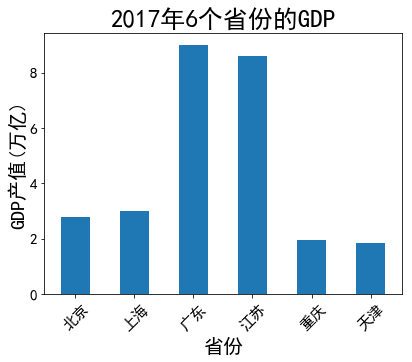

In [5]:
plt.figure(figsize=(6.4,4.8))
plt.bar(x =GDP.index.values,height =GDP.GDP ,align='center',tick_label= GDP.Province,width = 0.5 )
plt.xticks(GDP.index.values,GDP.Province,rotation = 45)
plt.xticks(fontsize=15 ) #坐标轴标签的刻度大小
plt.yticks(fontsize=15) #坐标轴标签的刻度大小
plt.xlabel('省份',fontsize = 20)
plt.ylabel('GDP产值(万亿)',fontsize = 20)
plt.title('2017年6个省份的GDP',fontsize = 25)
plt.show()

In [6]:
industry_GDP

NameError: name 'industry_GDP' is not defined

* 堆叠图

In [ ]:
industry_GDP = pd.read_excel('Industry_GDP.xlsx')

In [ ]:
temp = pd.pivot_table(data =industry_GDP, index = 'Quarter',columns ='Industry_Type',values='GDP',aggfunc=np.sum)

In [ ]:

plt.bar(x= temp.index.values,height= temp['第一产业'],color='steelblue',label='第一产业',tick_label = temp.index.values)
plt.bar(x= temp.index.values,height= temp['第二产业'],bottom =temp['第一产业'], color='green',label='第二产业',
        tick_label = temp.index.values)
plt.bar(x= temp.index.values,height = temp['第三产业'],bottom =temp['第一产业'] +  temp['第二产业'],color='red',label='第三产业',
        tick_label = temp.index.values)
plt.ylabel('生产总值(亿)')
plt.title('2017各季度三产业总值')
plt.legend(bbox_to_anchor=(1.01,0.8)) #图例显示在外面
plt.show()

* 堆叠图占比

In [ ]:
temp = pd.crosstab(industry_GDP['Quarter'],industry_GDP['Industry_Type'],values=industry_GDP['GDP'],\
                   aggfunc=np.sum,normalize='index')

In [ ]:
temp

In [ ]:

plt.bar(x= temp.index.values,height= temp['第一产业'],color='steelblue',label='第一产业',tick_label = temp.index.values)
plt.bar(x= temp.index.values,height= temp['第二产业'],bottom =temp['第一产业'], color='green',label='第二产业',
        tick_label = temp.index.values)
plt.bar(x= temp.index.values,height = temp['第三产业'],bottom =temp['第一产业'] +  temp['第二产业'],color='red',label='第三产业',
        tick_label = temp.index.values)
plt.ylabel('各产业占比')
plt.title('2017各季度三产业总值占比')
plt.legend(loc = 2,bbox_to_anchor=(1.01,0.8))
plt.show()

* 直方图

In [ ]:
Titanic = pd.read_csv('titanic_train.csv')
Titanic.dropna(subset=['Age'], inplace=True)

In [ ]:
# 绘制直方图
plt.hist(x = Titanic.Age, bins=20,color='c',edgecolor ='black',density=True)
plt.xlabel('年龄',fontsize =15)
plt.ylabel('频数',fontsize =15)
plt.title('乘客年龄分布图')
plt.show()

In [ ]:
# 添加核密度图和正态分布图
#normfun正态分布函数，mu: 均值，sigma:标准差，pdf:概率密度函数，np.exp():概率密度函数公式
def normfun(x,mu, sigma):
    pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

In [ ]:
mean_x = Titanic.Age.mean()
std_x = Titanic.Age.std()

In [ ]:
# x的范围为60-150，以1为单位,需x根据范围调试
x = np.arange(min(Titanic.Age), max(Titanic.Age)+10,1)
# x数对应的概率密度
y = normfun(x, mean_x, std_x)

In [ ]:
plt.hist(x=Titanic.Age, bins=20,color='c',edgecolor ='black',label ='分布图',density=True)
plt.plot(x,y, color='g',linewidth = 3,label ='正态分布图') #正态分布图
Titanic['Age'].plot(kind='kde',color='red',xlim=[0,90],label='核密度图')
plt.xlabel('年龄',fontsize =15,labelpad=15)
plt.ylabel('频数',fontsize =15,labelpad=15)
plt.title('乘客年龄分布图')
plt.legend()
plt.show()

* 箱线图


plt.boxplot(x,notch,sym,vert,whis,positions,widths,patch_artist,meanline,showmeans,
              boxprops,labels,flierprops)
* x:  数据
* width：宽度
* patch_artist: 是否填充箱体颜色
* meanline：是否显示均值
* showmeans: 是否显示均值
* meanprops;设置均值属性，如点的大小，颜色等
* medianprops:设置中位数的属性，如线的类型，大小等
* showfliers: 是否表示有异常值
* boxprops：设置箱体的属性，边框色和填充色
* cappops: 设置箱线顶端和末端线条的属性，如颜色，粗细等


In [ ]:
sec_building = pd.read_excel('sec_buildings.xlsx')

In [ ]:

plt.boxplot(x=sec_building.price_unit,patch_artist=True,showmeans =True,
            boxprops={'color':'black','facecolor':'steelblue'},
            showfliers=True,
            flierprops={'marker':'o','markerfacecolor':'red','markersize':5},
            meanprops={'marker':'D','markerfacecolor':'indianred','markersize':4},
            medianprops={'linestyle':'--','color':'orange'},labels=[''])
plt.title('二手房价分布箱线图')
plt.show()

* 散点图

In [ ]:
iris = pd.read_csv('iris.csv')

In [ ]:

#绘制散点图
plt.scatter(x = iris.Petal_Width,y = iris.Petal_Length,s =10,
            color ='steelblue')
plt.xlabel('花瓣宽度')
plt.ylabel('花瓣长度')
plt.title('鸢尾花花瓣宽度和长度关系图')
plt.show()

* 绘制不同种类的散点图关系

In [ ]:
# 使用循环方式
colors_iris = ['steelblue','indianred','green']
sepcies =[ 'setosa','versicolor','virginica']
merker_iris =['o','s','x']
for i in range(0,3):
    plt.scatter(x=iris.Petal_Width[iris['Species'] ==sepcies[i]], y=iris.Petal_Length[iris['Species'] == sepcies[i]], s=20,
                color=colors_iris[i], marker=merker_iris[i], label=sepcies[i])
plt.xlabel('花瓣宽度',fontsize =12, labelpad =20)
plt.ylabel('花瓣长度',fontsize = 12,  labelpad =20)
plt.title('不同种类的鸢尾花花瓣宽度和长度关系图',fontsize =12)
plt.legend(loc='upper left')
plt.show()

* 折线图

In [7]:
pd.set_option('display.max_columns', 8) # dataframe最多显示为8列
# # # # # # 图例和标题以及画图使用
data = pd.read_excel('国民经济核算季度数据.xlsx')

In [8]:
data.head(6)

,序号,时间,国内生产总值_当季值(亿元),第一产业增加值_当季值(亿元),...,住宿和餐饮业增加值_当季值(亿元),金融业增加值_当季值(亿元),房地产业增加值_当季值(亿元),其他行业增加值_当季值(亿元)
0,1,2000年第一季度,21329.9,1908.3,...,570.5,1235.9,933.7,3586.1
1,2,2000年第二季度,24043.4,3158.2,...,536.5,1124.0,904.7,3464.9
2,3,2000年第三季度,25712.5,4140.6,...,523.2,1170.4,1070.9,3518.2
3,4,2000年第四季度,29194.3,5510.2,...,516.1,1306.0,1239.7,3521.5
4,5,2001年第一季度,24086.4,2015.3,...,638.6,1341.5,1074.4,4342.2
5,6,2001年第二季度,26726.6,3235.0,...,599.6,1207.4,1015.1,4187.7


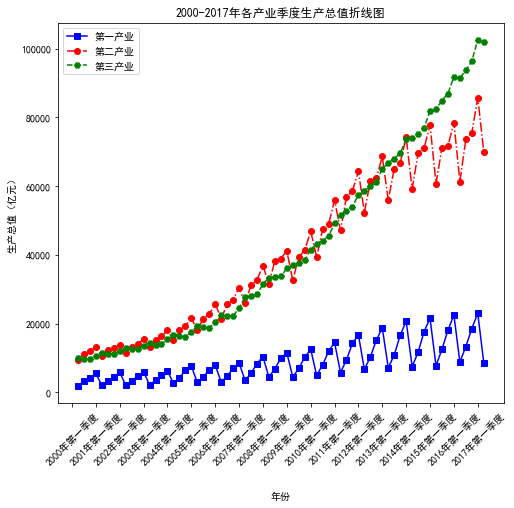

In [10]:
# 绘制折线图
fig =plt.figure(figsize=(8,7)) # 创建画布
plt.plot(data.iloc[:,0],data.iloc[:,3],'bs-',
       data.iloc[:,0],data.iloc[:,4],'ro-.',
       data.iloc[:,0],data.iloc[:,5],'gH--')## 绘制折线图
plt.xlabel('年份',labelpad =25)## 添加横轴标签
plt.ylabel('生产总值（亿元）')## 添加y轴名称
plt.xticks(range(0,70,4),data.iloc[range(0,70,4),1],rotation=45)
plt.title('2000-2017年各产业季度生产总值折线图')## 添加图表标题
plt.legend(['第一产业','第二产业','第三产业'])
# plt.savefig('2000-2017年季度各产业生产总值折线图.pdf')
plt.show()

### 2. 完善统计图形


* 图例和画布使用


In [11]:
# # # # # # 图例和标题以及画图使用
data = pd.read_excel('国民经济核算季度数据.xlsx')

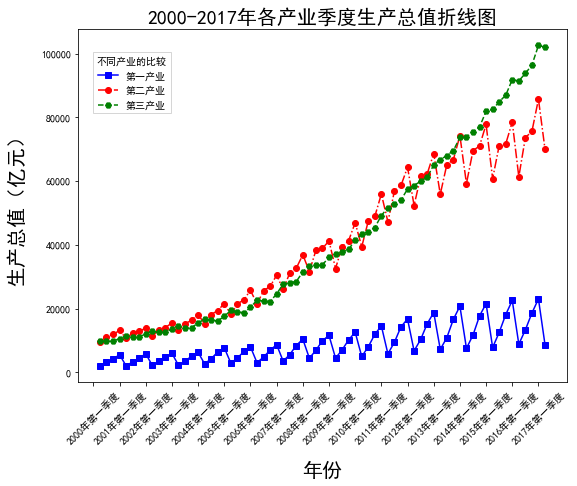

In [12]:
fig = plt.figure(figsize=(8,7)) # 创建画布
ax = fig.add_axes([0.10,0.2,0.85,0.7]) # Axes是画布上的绘图区域，可以添加多块
plt.plot(data.iloc[:,0],data.iloc[:,3],'bs-',label='第一产业')
plt.plot(data.iloc[:,0],data.iloc[:,4],'ro-.',label='第二产业')
plt.plot(data.iloc[:,0],data.iloc[:,5],'gH--',label='第三产业')## 绘制折线图
plt.xlabel('年份',labelpad=15,fontsize=20)## 添加横轴标签
plt.ylabel('生产总值（亿元）',labelpad=15,fontsize=20,style='oblique') ## 添加y轴名称
plt.xticks(range(0,70,4),data.iloc[range(0,70,4),1],rotation=45,fontsize=10)
plt.title('2000-2017年各产业季度生产总值折线图',fontsize=20)## 添加图表标题
plt.legend(loc='upper right',bbox_to_anchor=(0.20,0.95),ncol=1, frameon=True, #是否要边框
           title ='不同产业的比较',shadow=False, fancybox=False)
plt.savefig('2000-2017年季度各产业生产总值折线图.pdf')
plt.show()

* 调整刻度轴

In [ ]:
import os 
import pandas as pd
os.chdir(r'E:\云开明培训机构\云开见明培训课件\data summary\第四章')
data = pd.read_excel('Prod_Trade.xlsx')

In [ ]:
data_1 = data.groupby('Date').mean()

In [ ]:
data_1

In [ ]:
plt.plot(data_1.index, # x轴数据
         data_1['Sales'], # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue') # 折线颜色
         #marker = 'o', # 折线图中添加圆点
         #markersize = 6, # 点的大小
        # markeredgecolor='black', # 点的边框色
         #markerfacecolor='brown') # 点的填充色
# 添加y轴标签
plt.ylabel('订单金额')
# 添加图形标题
plt.title('订单金额的变化趋势',size=12,color = 'black')
# 显示图形
plt.show()

In [ ]:
import matplotlib as mpl
# 获取图的坐标信息
ax = plt.gca()
# 设置日期的显示格式
date_format = mpl.dates.DateFormatter("%Y-%m-%d")

In [ ]:
plt.plot(data_1.index, # x轴数据
         data_1['Sales'], # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue') # 折线颜色
         #marker = 'o', # 折线图中添加圆点
         #markersize = 6, # 点的大小
        # markeredgecolor='black', # 点的边框色
         #markerfacecolor='brown') # 点的填充色
# 添加y轴标签
plt.ylabel('订单金额')
# 添加图形标题
plt.title('订单金额的变化趋势',size=12,color = 'black')
# 显示图形
plt.show()

In [ ]:
import matplotlib as mpl
# 获取图的坐标信息
ax = plt.gca()
fig = plt.gcf() #返回当前图像并设置为该图像对象名称为fig
fig.set_size_inches(10,9) 
# 设置日期的显示格式
date_format = mpl.dates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_format)
# 设置x轴显示多少个日期刻度
xlocator = mpl.ticker.LinearLocator(20)
# 设置x轴每个刻度的间隔天数
#xlocator = mpl.ticker.MultipleLocator(100)
ax.xaxis.set_major_locator(xlocator)
# 为了避免x轴刻度标签的紧凑，将刻度标签旋转45度
plt.plot(data_1.index, # x轴数据
         data_1['Sales'], # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue') # 折线颜色
plt.xticks(rotation=45)
# 添加y轴标签
plt.ylabel('订单总价')
# 添加图形标题
plt.title('订单变化趋势')
# 添加图例
plt.legend()
# 显示图形
plt.show()


* 添加图形内容

In [ ]:
plt.figure(figsize=(6.4,4.8))
plt.bar(x =GDP.index.values,height =GDP.GDP ,align='center',tick_label= GDP.Province,width = 0.5 )
plt.xticks(GDP.index.values,GDP.Province,rotation = 45)
plt.xticks(fontsize=15 ) #坐标轴标签的刻度大小
plt.yticks(fontsize=15) #坐标轴标签的刻度大小
plt.xlabel('省份',fontsize = 20)
plt.ylabel('GDP产值(万亿)',fontsize = 20)
plt.title('2017年6个省份的GDP',fontsize = 25)
plt.text(0,4,'GDP最高的是广东',weight ='bold',color='red',fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(6.4,4.8))
plt.bar(x =GDP.index.values,height =GDP.GDP ,align='center',tick_label= GDP.Province,width = 0.5 )
plt.xticks(GDP.index.values,GDP.Province,rotation = 45)
plt.xticks(fontsize=15 ) #坐标轴标签的刻度大小
plt.yticks(fontsize=15) #坐标轴标签的刻度大小
plt.xlabel('省份',fontsize = 20)
plt.ylabel('GDP产值(万亿)',fontsize = 20)
plt.title('2017年6个省份的GDP',fontsize = 25)
plt.annotate('GDP最高的是广东',xy=(2,8), xytext=(0,4),weight='bold',color='black',
             arrowprops =dict(arrowstyle='->',connectionstyle = 'arc3',color='red')) 
# xy=(2,8) 也可以理解为箭头的位置
plt.show()

### 3. 图形样式高级操作


* 绘制双坐标轴

In [15]:
import os 
import pandas as pd
os.chdir(r'E:\云开明培训机构\云开见明培训课件\data summary\第四章')
data = pd.read_excel('Prod_Trade.xlsx')

In [16]:
data_1 = data.groupby('Region').mean()

In [17]:
data_1

,Sales,Trans_Cost
Region,,
东北,1756.984094,13.029785
华东,1747.487949,12.648524
华北,1803.506256,12.945072
华南,1776.521742,12.675480
西北,1666.225981,13.756375
西南,1896.926680,13.392840


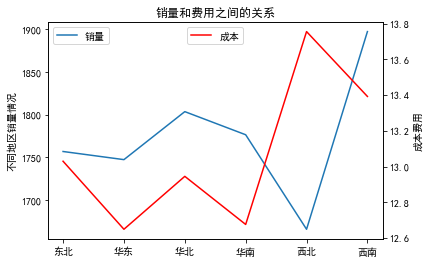

In [18]:
# # # # # # 绘制双坐标(双Y轴)
fig = plt.figure() # 创建作图对象
ax1 = fig.add_subplot(111)
ax1.plot(data_1.index, data_1.Sales,label='销量')
ax1.set_ylabel('不同地区销量情况')
ax1.set_title("销量和费用之间的关系")
plt.legend(loc ='upper left')
ax2 = ax1.twinx()  # this is the important function #添加次坐标轴
ax2.plot(data_1.index, data_1.Trans_Cost, 'r',label='成本')
ax2.set_ylabel('成本费用')
plt.legend(loc ='upper center')
plt.show()

* 多个图形合并


In [ ]:
GDP_data = pd.read_excel('国民经济核算季度数据.xlsx')
GDP = pd.read_excel('Province GDP 2017.xlsx')
Titanic = pd.read_csv('titanic_train.csv')
Titanic.dropna(subset=['Age'], inplace=True)

In [ ]:
GDP

In [ ]:
# 设置绘图区域
plt.figure(figsize=(16,9))
plt.subplot(121) # 位置
plt.plot(GDP_data['序号'],GDP_data['国内生产总值_当季值(亿元)'],c= 'c')
plt.xlabel("季度",fontsize=18)
plt.ylabel('GDP(产值)',fontsize=18)
plt.xticks(range(0,70,4),GDP_data.iloc[range(0,70,4),1],rotation=45)
plt.subplot(122)
plt.bar(x = GDP.Province,height = GDP.GDP,color= 'c')
plt.xlabel("地区",fontsize=18)
plt.ylabel('GDP值（万元）',fontsize=18)
#plt.xaxis.set_label_coords(1.05,-0.05)
plt.xticks(range(0,6,1),GDP.iloc[range(0,6,1),0],rotation=45)
plt.show()

* subplot2grid应用

* subplot2grid函数可以让子区跨越固定的网格布局的多个行和列，实现不同的子区布局
* plt.subplot2grid(shape,loc,colspan,rowspan) 参数
* shape: 网格布局
* loc: 表示图形的位置起点
* colspan: 跨越的列数
* rowspan : 跨越的行数


In [ ]:
#  设置绘图区域
plt.figure(figsize=(16,9))
plt.subplot2grid((2,3),(0,0),colspan = 1,rowspan=2) #设置绘图区域
plt.plot(GDP_data['序号'],GDP_data['国内生产总值_当季值(亿元)'],c= 'c')
plt.xlabel("季度",fontsize=18)
plt.ylabel('GDP(产值)',fontsize=18)
plt.xticks(range(0,70,4),GDP_data.iloc[range(0,70,4),1],rotation=45)

plt.subplot2grid((2,3),(0,1),colspan =2,rowspan=1 ) #设置绘图区域
plt.bar(x = GDP.Province,height = GDP.GDP,color= 'c')
plt.ylabel('GDP值（万元）',fontsize=18)
plt.xticks(range(0,6,1),GDP.iloc[range(0,6,1),0],rotation=45)

plt.subplot2grid((2,3),(1,1),colspan=2,rowspan=1) #设置绘图区域
plt.hist(x = Titanic.Age, bins=20,color='c',edgecolor ='black',density=True)
plt.xlabel('年龄',fontsize =15)
plt.ylabel('频数',fontsize =15)
# 显示
plt.suptitle('不同图形的展示',size=20)
plt.show()